# Jurnal Modul 1

code berikut merupakan library yang dipakai pada jurnal modul 1 ini.
1.import numpy berfungsi sebagai menampilkan nilai matriks yang berbentuk array
2.import matplotlib/plt berfungsi sebagai menampilkan sebbuah histogram yang ada dibawah
3.import cv2 berfungsi untuk menampilkan gambar pada python
4.import matplotlib.image as mpimg berfungsi untuk menampilkan gambar yang di import ke dalam python

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as img 
import cv2 as cv
import numpy as np

kode dibawah menggunakan library matplotlib.pylot dan berfungsi untuk menampilkan gambar asli aang.jpg

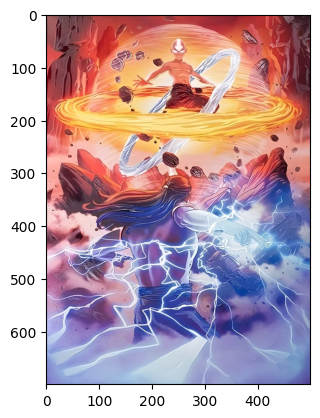

In [18]:
image = img.imread("./images/aang.jpg")
plt.imshow(image)

# Grayscale

kode dibawah berfungsi sebagai mengconvert color dari beberapa layer menjadi satu layer yaitu abu saja, yang sebelumnya ada beberapa warna dari layer digabung menjadi satu layer yang menghasilkan warna abu dan plt berfungsi untuk menampilkan gambar yang berwarna abu dengan color mapnya gray

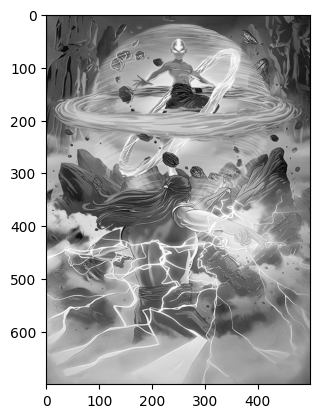

In [19]:
grayImage = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

plt.imshow(grayImage, cmap="gray")

grayImage.shape digunakan untuk menampilkan bit dari foto yang di import, sedangkan grayImage.sum memberikan jumlah semua nilai piksel dalam gambar grayscale. 
kanvas2 = np.zeros(256, dtype=int) digunakan untuk embuat array kanvas2 yang terdiri dari 256 elemen, yang semuanya diinisialisasi dengan nilai 0. dan dtype=int menentukan bahwa tipe data elemen array adalah integer. terjadi perulangan itu agar setiap piksel dari citra dari i dan j bisa diakses
dan menampilkan total gray divalue yang ada

In [54]:
grayImage.sum()

kanvas = [i for i in range (256)]

tinggi, lebar = grayImage.shape

print("Tinggi : " ,tinggi)
print("Lebar : " ,lebar)

kanvas2 = np.zeros(256, dtype=int)

for i in range(tinggi):
    for j in range(lebar):
        value = grayImage[i,j]

        kanvas2[value] += 1

print(kanvas2)

Tinggi :  700
Lebar :  500
[   0    0    0   11   22   29   59   76   59   73   68   73   92   77
  110  103  159  127  130  162  171  163  157  147  146  150  143  168
  191  249  348  362  401  412  360  375  389  400  396  406  484  430
  482  473  538  502  589  584  614  592  620  635  636  662  680  819
  772  900  916  943 1066 1100 1142 1183 1273 1282 1207 1189 1140 1242
 1491 1756 1787 1930 1881 1894 2034 2083 2180 2174 2128 2059 1966 1942
 1893 1810 1774 1773 1848 1891 1830 1764 1744 1743 1749 1717 1833 1938
 1744 1732 1788 1829 1869 1859 1664 1715 1787 1727 1754 1767 1881 1813
 1900 1811 1843 1811 1810 1784 1757 1845 1758 1681 1712 1752 1724 1717
 1734 1723 1647 1630 1781 1646 1679 1757 1793 1724 1791 1876 1971 1948
 2109 2034 2081 2079 2157 2129 2182 2059 2143 2203 2221 2204 2269 2445
 2404 2359 2277 2557 2670 2690 2636 2607 2768 2709 2767 2953 2752 2708
 2622 2671 2592 2497 2534 2478 2643 2654 2540 2556 2467 2394 2529 2463
 2606 2672 2411 2481 2564 2436 2509 2483 2168 2146

# Histogram

kode kanvas = [i for i in range (256)] menampilkan daftar kanvas yang berisi nilai-nilai dari 0 hingga 255. kode plt.bar(kanvas, kanvas2,color="green") akan menghasilkan histogram yang menunjukkan distribusi intensitas piksel untuk gambar grayscale

<BarContainer object of 256 artists>

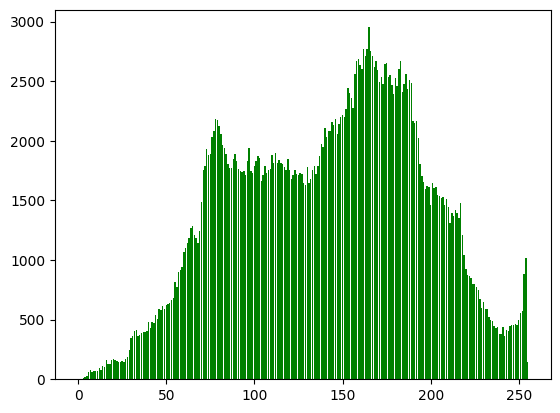

In [33]:
kanvas = [i for i in range (256)]
plt.bar(kanvas, kanvas2,color="green")

# Konvolusi

kode tersebut menampilkan nilai-nilai dalam matriks kernel ke konsol atau output yang sesuai dam menetapkan variabel kernel menjadi variabel array

In [34]:
kernel = np.array([[1, 2, -1, 1], 
                   [0, 2, 1, 2 ], 
                   [2, 1, 1, 0 ], 
                   [1, 0, -1, 0]])

print(kernel)

[[ 1  2 -1  1]
 [ 0  2  1  2]
 [ 2  1  1  0]
 [ 1  0 -1  0]]


kode tersebut adalah langkah-langkah untuk melakukan zero-padding pada citra grayImage menggunakan kernel yang telah didefinisikan sebelumnya.

In [37]:
img_tinggi, img_lebar = grayImage.shape
kernel_tinggi, kernel_lebar = kernel.shape

padding_size = int((kernel_tinggi - 1) / 2)
pad_width=((padding_size, padding_size+1), (padding_size, padding_size+1))
padding_grayimage = np.pad(grayImage, pad_width, mode='constant')
zeroPadding = np.zeros((img_tinggi, img_lebar))

kode dibawah adalah langkah-langkah untuk menerapkan operasi konvolusi pada citra yang telah dipad dengan nol menggunakan kernel yang telah didefinisikan sebelumnya. 

In [38]:
for i in range(zeroPadding.shape[0]):
    for j in range(zeroPadding.shape[1]):   
        subset = padding_grayimage[i:i + kernel_tinggi, j:j + kernel_lebar]
        weighted_subset = subset * kernel
        sum_of_weighted_subset = np.sum(weighted_subset)
        zeroPadding[i][j] = np.round(sum_of_weighted_subset)
        
print (zeroPadding)

[[ 824. 1142. 1024. ...  194.  179.  161.]
 [1108. 1460. 1312. ...  289.  280.  247.]
 [1083. 1418. 1260. ...  326.  325.  286.]
 ...
 [1233. 1809. 1737. ... 1140.  857.  859.]
 [1383. 1803. 1758. ... 1137.  850.  759.]
 [1084. 1199. 1183. ...  754.  472.  473.]]


kode dibawah dilakukan clipping pada citra atau konvolusi untuk mengubah rentang nilai piksel citra dan menampilkan gambar seteelah clipping

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


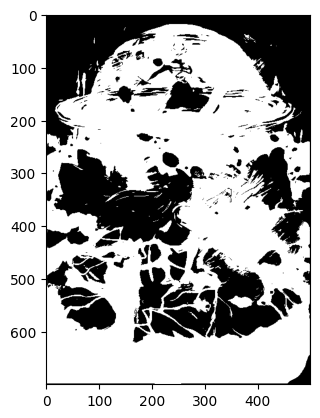

In [41]:
min = np.min(zeroPadding)
max = np.max(zeroPadding)
Clipping = np.round((zeroPadding - min) / (max - min))
print(Clipping)

plt.imshow(Clipping,cmap='gray')

# Translasi

kode dibawah dilakukan translasi pada citra grayscale untuk menggeser setiap piksel dalam citra dalam arah tertentu.

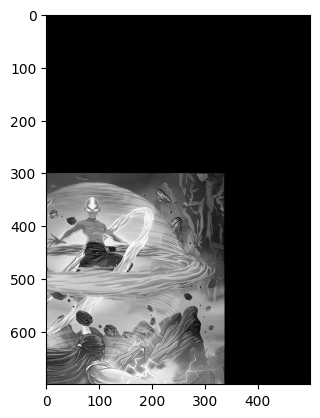

In [67]:
Translasi = np.zeros((tinggi, lebar)).astype(int)
for i in range (tinggi) :
    for j in range (lebar) :
        if i-300>0 and j+163<lebar :
            Translasi[i][j] = grayImage[i-300][j+163]
            
plt.imshow(Translasi,cmap="gray")

# Rotasi

kode dibwah digunakan untuk memutar citra dengan sudut 40 derajat. pertama inisialisasi dulu matriks rotasinya, setelah itu kita hitung sudut rotasinya, hitung koordinat pusatnya lalu citra melakukan rotasi. setelah itu menampilkan citra hasil rotasi

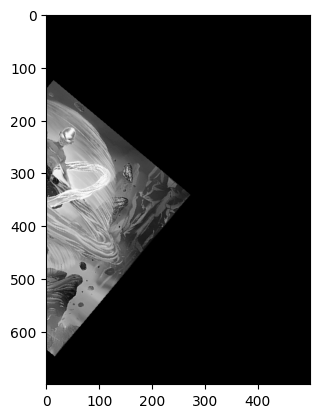

In [62]:
tinggir , lebarr = Translasi.shape
Rotasi = np.zeros((tinggir,lebarr)).astype(int)

Sudut= np.deg2rad(-40)
cos=np.cos(Sudut)
sin=np.sin(Sudut)

tinggitg = int((tinggir-1)/3)
lebartg = int((lebarr-1)/2)
for i in range (Rotasi.shape[0]):
    for j in range (Rotasi.shape[1]):
        x=(i-tinggitg)*cos+(j-lebartg)*sin
        y=-(i-tinggitg)*sin+(j-lebartg)*cos
        x = int(x + tinggitg)
        y = int(y + lebartg)
        if x>=0 and y>=0 and x<Rotasi.shape[0] and y<Rotasi.shape[1] :
            Rotasi[i][j]= Translasi[x][y]
            
plt.imshow(Rotasi,cmap="gray")

# Pencerminan

kode dibawah untuk melakukan pencerminan pada citra grayscale dari rotasi terhadap sumbu Y.  pertama ambil dulu citra setelah rotasinya, inisialisasi dulu matriks pencerminannya, lalu dilakukan pencerminan terhadap sumbu y dan setelah itu menampilkan citra hasil pencerminan

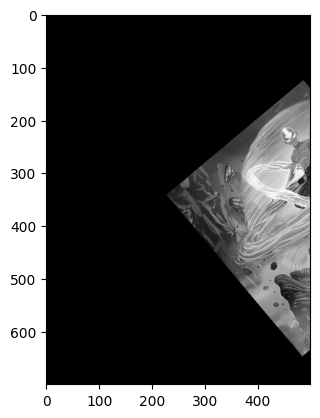

In [63]:
tinggir , lebarr = Rotasi.shape

balik = np.zeros((tinggir, lebarr)).astype(int)
for i in range (tinggir) :
    for j in range (lebarr) :
        balik[i][j] = Rotasi[i][lebarr-j-1]
        
plt.imshow(balik,cmap="gray")

# Dilatasi

kode dibawah dilakukan untuk memperbesar citra 3x dari ukuran aslinyapertama inisialisasi dulu matriks dilatasinya, setelah itu dilakukan looping menyesuaikan ukurannya. setelah itu menampilkan citra hasil dilatasi

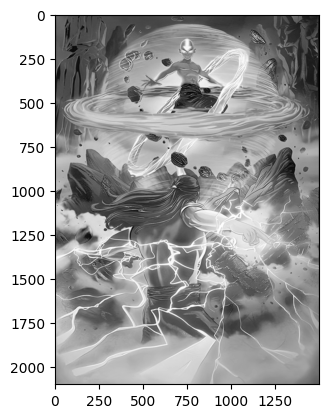

In [53]:
Dilatasi = np.zeros((tinggi*3, lebar*3)).astype(int)
for i in range (tinggi*3) :
    for j in range (lebar*3) :
        ntinggi = int(tinggi * i / (tinggi*3))
        nlebar = int(lebar * j / (lebar*3))
        Dilatasi[i][j] =  grayImage[ntinggi][nlebar]
                                
plt.imshow(Dilatasi,cmap="gray")